In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics
import csv

In [8]:
igk_gen_seqs = "/ibmm_data2/oas_database/paired_lea_tmp/paired_model/BERT2BERT/humanness_score_AbnatiV/PLAbDab_human_healthy_full_diverse_beam_search_5_temp_0.2_max_length_150_early_stopping_true_batch_size_64_epochs_50_lr_0.0001_wd_0.1/abnativ_output_full/full_igk_gen_sequences_abnativ_seq_scores.csv"

igk_true_seqs = "/ibmm_data2/oas_database/paired_lea_tmp/paired_model/BERT2BERT/humanness_score_AbnatiV/PLAbDab_human_healthy_full_diverse_beam_search_5_temp_0.2_max_length_150_early_stopping_true_batch_size_64_epochs_50_lr_0.0001_wd_0.1/abnativ_output_full/full_igk_true_sequences_abnativ_seq_scores.csv"

with open(igk_gen_seqs, "r") as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)
        break

['', 'seq_id', 'input_seq', 'aligned_seq', 'AbNatiV VKappa Score', 'AbNatiV CDR1-VKappa Score', 'AbNatiV CDR2-VKappa Score', 'AbNatiV CDR3-VKappa Score', 'AbNatiV FR-VKappa Score']


/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of AbNatiV VKappa Humanness Score')

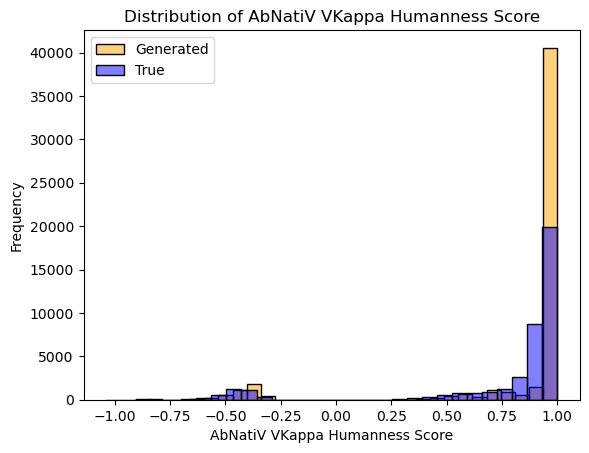

In [15]:
igk_gen_seqs_df = pd.read_csv(igk_gen_seqs)
igk_true_seqs_df = pd.read_csv(igk_true_seqs)

# extract AbNatiV VKappa Score
abnativ_vkappa_score_gen = igk_gen_seqs_df["AbNatiV VKappa Score"]
abnativ_vkappa_score_true = igk_true_seqs_df["AbNatiV VKappa Score"]

# plot histogram
sns.histplot(abnativ_vkappa_score_gen, bins=30, alpha=0.5, color="orange")
sns.histplot(abnativ_vkappa_score_true, bins=30, alpha=0.5, color="blue")
plt.legend(["Generated", "True"])
plt.xlabel("AbNatiV VKappa Humanness Score")
plt.ylabel("Frequency")
plt.title("Distribution of AbNatiV VKappa Humanness Score")
